Readings:
- [SVM in Japanese](https://drumato.hatenablog.com/entry/2018/11/17/234633)
- [SVM in Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)

In [3]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from implements_05.functions_05 import * 

--- 

<font size="5">Overviews</font>
1. Introduction
1. Theory: Support Vector Machine (SVM)
1. Dataset
1. Some Failed Examples
1. Practice: Support Vector Machine (SVM)
1. Excercise

---

# Introduction
In this notebook, I'll offer you some excercises regarding overfitting and underfitting. You need to solve problems by the use of SVM with hyper-parameters you set. First of all, I'll explain SVM intuitively and hyper-parameter you'll optimize. At the end, I'll give you some questions to check your understanding.  

---

# Theory: Support Vector Machine (SVM)
SVM is one of supervised machine learning models, and one of binary classifiers. In order to get any idea of this, I will explain it by comparing it with simple linear binary classifier. 

For practice carried out after this explanation, as I said, you will tune hyper-parameters for your own. The hyper-parameters you optimize are "C", "degree", "gamma", and "kernel". Please keep it in mind while reading explanation below.

---

## Comparison of SVM and Linear Binary Classifier ?
Taking comparison of linear classification and SVM is easy way to understand SVM. At first the dataset is assumed as the image presents.

<img src="implements_05/image/dataset.jpg" width="300">

In linear classification there are a lot of solution as shown in figure below.

<img src="implements_05/image/linear_classification.jpg" width="300">

These red line is called decision boundary and on this line, decision/prediction changes in front of and behind it. 
It is obvious that 3rd decision boundary is more robust than the others. 
SVM is trained to have this 3rd decision boundary as shown the figure below.

<img src="implements_05/image/svc.jpg" width="300">

The data Highlighted in yellow is called Support Vector and this is the closest data from decision boundary.
SVM is trained to make the support vector distance as far as possible.

---

## What is hard margin and soft margin ?
The difference between soft and hard margin is whether data is allowed to be located inside margin line 
(it's not official, highlighted in orange in Fig.2) or not. 
Fig.2 represents the example of hard margin, there is no data inside the margin line.
In theory, new loss above is added:
$$
max(0, 1 - y_i(\vec w \cdot \vec x_i - b))
$$
Originally, the data needs to be $|y|>1$. However, in this loss, the data inside the margin line is also computable. 
So overall loss function is going to be:
$$
\text{loss} = \left[\frac{1}{n} \sum_{n=1}^n max(0, 1 - y_i(\vec w \cdot \vec x_i - b))\right] + \text{C}\|\text{W}\|
$$
Where second loss behaves as hard margin and C controls the level of hard margin.

The images below show the example of hard margin and soft margin (left: hard margin, right: soft margin)\
<img src="implements_05/image/hard_margin.jpg" width="300"> <img src="implements_05/image/soft_margin.jpg" width="300">

---

## What is kernel ?
As I said in lesson 04, 
underfitting is crucial problem for machine learning and this linear classification might be not enough for classification.
So now you need to employ non-linear function. 
Most simplest way to add complexity is making it polynomial.
To put it simply, instead of adding $\{x\}$, $\{x, x^2, x^3, ..., x^{degree}\}$ is added as training dataset.
So the problem is that the higher degree you set, the more computational cost is needed.
To solve this problem, kernel function was invented.
instead of adding $\{x\}$, $\{\phi(x)\}$ is added and this $\phi(\cdot)$ is called kernel function.
the most popular one is gaussian rbf kernel, defined as:
$$
\phi(x) = \exp(- \gamma \|x - l \|^2)
$$
Where $\gamma$ is hyper-parameter for this kernel and higher gamma tries to fit the training dataset.

---

# data
In this section, I'm going to visualize the training data. And what's important is basically I won't show you the test dataset, but it will give you high accuracy when the model is trained properly. 

In [4]:
# do not change the valuables below
train, test = train_test_generation(3, 0.3, 1000, 10000)

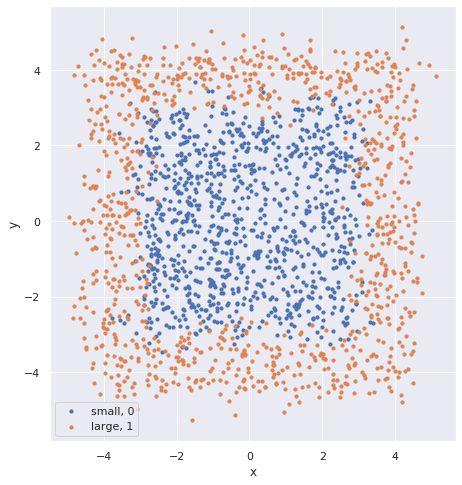

In [5]:
# training data visulization
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1)
x1 = train[train.target==0].drop("target", axis=1).values
x2 = train[train.target==1].drop("target", axis=1).values
ax.scatter(x1[:, 0], x1[:, 1], label="small, 0", s=10)
ax.scatter(x2[:, 0], x2[:, 1], label="large, 1", s=10)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()

---

# Some Failed Examples
Before having a practice, I would like to share some failed examples of the model.
Please go over it first, and think what happened and why it happened.

## Underfitting

In [8]:
C = 1
kernel = "linear" # choices are "linear", "poly", "rbf"
degree = 3 # you can use this valuable if you choose "poly" for kernel.
gamma = 1 # you can use this valuable if you choose "rbf" for kernel.

train accuracy: 0.5395
test accuracy : 0.5159105851413543


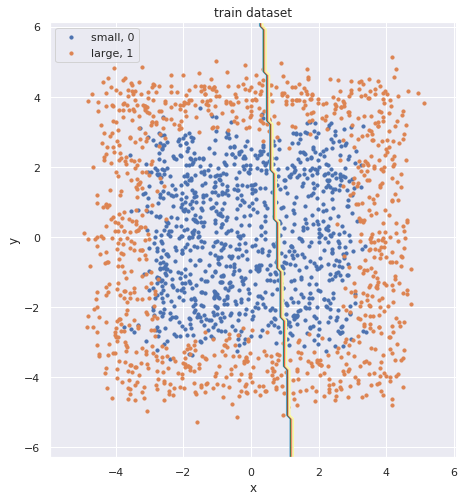

In [9]:
svm, train, tets, train_acc, test_acc = train_model(train, test, C, kernel, degree, gamma)
print(f"train accuracy: {train_acc}")
print(f"test accuracy : {test_acc}")
get_decision_boundary(svm, train, test, kernel, degree, False)

## Overfitting

In [16]:
C = 1
kernel = "rbf" # choices are "linear", "poly", "rbf"
degree = 3 # you can use this valuable if you choose "poly" for kernel.
gamma = 100 # you can use this valuable if you choose "rbf" for kernel.

train accuracy: 0.987
test accuracy : 0.9061801446416831


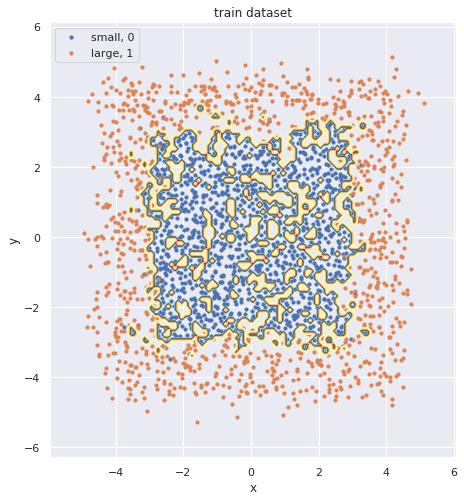

In [17]:
svm, train, tets, train_acc, test_acc = train_model(train, test, C, kernel, degree, gamma)
print(f"train accuracy: {train_acc}")
print(f"test accuracy : {test_acc}")
get_decision_boundary(svm, train, test, kernel, degree, False)

---

# Practice: Support Vector Machine (SVM)
In this section, you will try to train SVM with hyper-parameters you set.
The hyper-parameters are "C", "kernel", "degree", and "gamma".
<span style="color:red">Please be careful to use high degree in poly kernel</span>
please recall 'the larger degree is set, the higher computational cost is needed'

<font size="4">Hyper parameter selection</font>

In [ ]:
C = 
kernel = "" # choices are "linear", "poly", "rbf"
degree =  # you can use this valuable if you choose "poly" for kernel.
gamma =  # you can use this valuable if you choose "rbf" for kernel.

In [ ]:
svm, train, tets, train_acc, test_acc = train_model(train, test, C, kernel, degree, gamma)
print(f"train accuracy: {train_acc}")
print(f"test accuracy : {test_acc}")
get_decision_boundary(svm, train, test, kernel, degree, False)

---

# Excercise

<font size="4">Put hyper-parameters you chose and accuracy</font>
- C: 
- kernel: 
- degree or gamma: 
- test accuracy: 

<font size="4">Question</font>

Q.1 What do you think of how the test dataset looks ? \
Answer:

Q.2 which fights the overfitting, smaller C or larger C ? \
Answer:

Q.3 why did you choose in Q.1 ? \
Answer:

Q.4 why did you choose this kernel ?\
Answer:

Q.5 what happen if you set gamma to large/small ?\
Answer:

## Test dataset
<span style="color:red">Be sure to finish your excercise first</span>.
In this section, I will show the test dataset I used for this experiment.
Put your hyper-parameters below.

In [6]:
C = 1
kernel = "rbf" # choices are "linear", "poly", "rbf"
degree = 3 # you can use this valuable if you choose "poly" for kernel.
gamma = 50 # you can use this valuable if you choose "rbf" for kernel.

train accuracy: 0.978
test accuracy : 0.9653653653653653


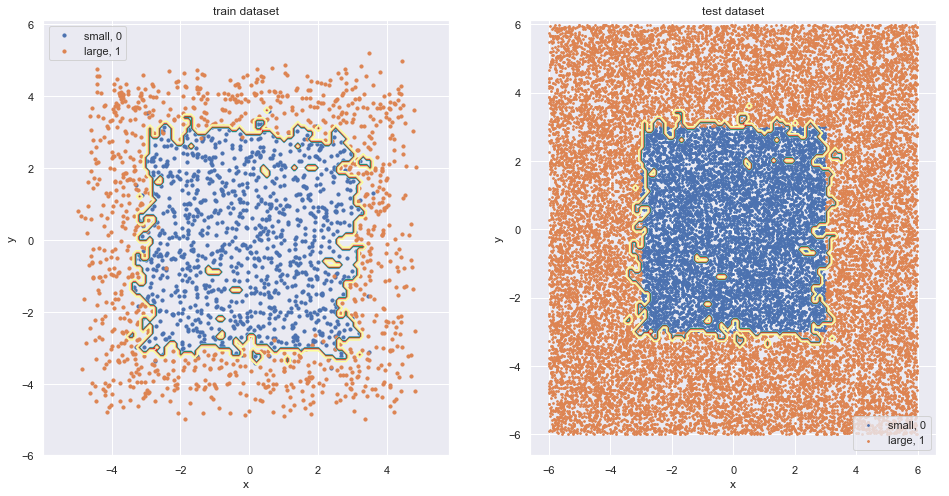

In [7]:
svm, train, tets, train_acc, test_acc = train_model(train, test, C, kernel, degree, gamma)
print(f"train accuracy: {train_acc}")
print(f"test accuracy : {test_acc}")
get_decision_boundary(svm, train, test, kernel, degree, True)